# Probablity Distributions

**In probability theory and statistics, a probability distribution is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment. It is a mathematical description of a random phenomenon in terms of its sample space and the probabilities of events (subsets of the sample space).**

**For instance, if X is used to denote the outcome of a coin toss ("the experiment"), then the probability distribution of X would take the value 0.5 (1 in 2 or 1/2) for X = heads, and 0.5 for X = tails (assuming that the coin is fair). Examples of random phenomena include the weather conditions at some future date, the height of a randomly selected person, the fraction of male students in a school, the results of a survey to be conducted, etc.**

**Source:** https://en.wikipedia.org/wiki/Probability_distribution

<p style = "color : red ; font-size : 20px"> In this notebook, I discuss the following topics:

* Binomial Distribution
* Poisson Distribution
* Normal Distribution
* Exponential Distribution
* How to confirm the distribution of a variable. 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/home/venkyuser/ipl/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/venkyuser/ipl/IPL Matches 2008-2020.csv
/home/venkyuser/ipl/IPL Ball-by-Ball 2008-2020.csv
/home/venkyuser/ipl/ipl-exploratory.py


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
from decimal import Decimal
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the data
ball_by_ball_data = pd.read_csv("/home/venkyuser/ipl/IPL Ball-by-Ball 2008-2020.csv")
match_data = pd.read_csv("/home/venkyuser/ipl/IPL Matches 2008-2020.csv")

In [5]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


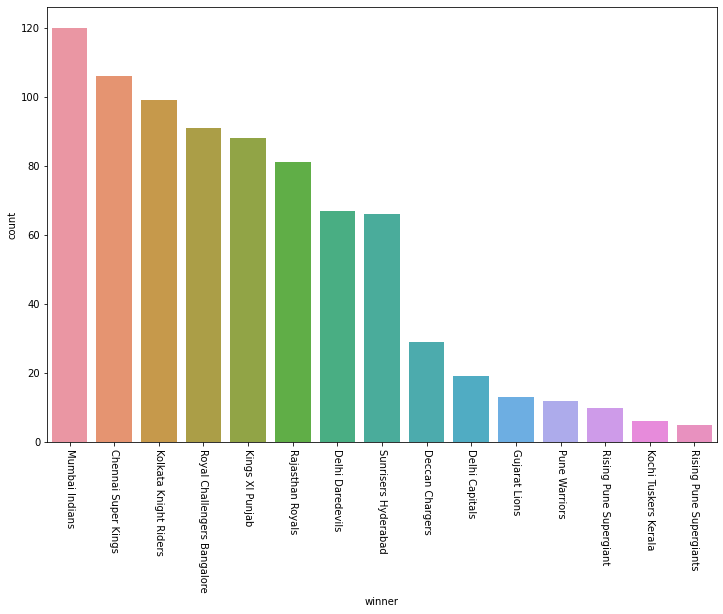

In [6]:
# Plot the wins distribution
plt.figure(figsize=(12,8))
sns.countplot(data=match_data, x='winner', order = list(match_data['winner'].value_counts().index))
plt.xticks(rotation=-90)
plt.show()

In [7]:
# Rename Rising Pune Supergiant as Rising Pune Supergiants
match_data['team1'] = match_data['team1'].apply(lambda x : 'Rising Pune Supergiants' if x == 'Rising Pune Supergiant' else x)
match_data['team2'] = match_data['team2'].apply(lambda x : 'Rising Pune Supergiants' if x == 'Rising Pune Supergiant' else x)
match_data['winner'] = match_data['winner'].apply(lambda x : 'Rising Pune Supergiants' if x == 'Rising Pune Supergiant' else x)
match_data['toss_winner'] = match_data['toss_winner'].apply(lambda x : 'Rising Pune Supergiants' if x == 'Rising Pune Supergiant' else x)

# Binomial Distribution

**The binomial distribution is used when there are exactly two mutually exclusive outcomes of a trial. These outcomes are appropriately labeled "success" and "failure". The binomial distribution is used to obtain the probability of observing x successes in N trials, with the probability of success on a single trial denoted by p. The binomial distribution assumes that p is fixed for all trials.**

**Binomial distributions must also meet the following three criteria:**

* The number of observations or trials is fixed. In other words, you can only figure out the probability of something happening if you do it a certain number of times. This is common sense—if you toss a coin once, your probability of getting a tails is 50%. If you toss a coin a 20 times, your probability of getting a tails is very, very close to 100%.

* Each observation or trial is independent. In other words, none of your trials have an effect on the probability of the next trial.

* The probability of success (tails, heads, fail or pass) is exactly the same from one trial to another.

# PMF of Binomial Distribution is given by:

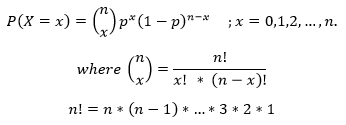

In [8]:
match_data['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [9]:
# Lets calculate the winning probability of each team

def winning_probability(team):
    
    '''
    Note: Here, I am considering the winning probability as the ratio of number of matches won by a team to the number of matches played.
    '''
    
    # Extract the data for the given team
    team_data = match_data[(match_data['team1'] == team) | (match_data['team2'] == team)]

    # Calculate the total number of matches played, won and lost
    total_matches_played = team_data.shape[0]
    total_matches_won = team_data[team_data['winner'] == team].shape[0]
    total_matches_lost = team_data[team_data['winner'] != team].shape[0]

    # Calculate the winning and losing probability
    
    '''
    Here, the winning and losing probabilities is taken as follows:
    
    Winning Probability = Total Matches Won/ Total Matches Playes
    Losing Probability = Total Matches Lost/ Total Matches Played 
    '''
    winning_probability = total_matches_won/total_matches_played
    losing_probability = total_matches_lost/total_matches_played
     
    # Print the results for the given team
    print("Winning Probability for {} is {:.3f}".format(team, winning_probability))
    print("Losing Probability for {} is {:.3f}".format(team, losing_probability))

    print()
    return winning_probability, losing_probability

In [10]:
# Function to compute the Probability Mass Function of a Binomila Distribution

def compute_binomial_probability(x, n, p):
    
    '''
    x = Number of events
    n = Total number of trials
    p = Winning probability(success)
    '''
    
    PMF = (math.factorial(n)*math.pow(p, x)*math.pow((1-p), (n-x)))/(math.factorial(x)*math.factorial(n-x))
    return PMF

# Function to plot the Binomial Distribution
def plot_binomial_distribution(team, n, p):
    
    '''
    n = Total Number of Trials
    p = Success Probability
    '''
    
    probabilities = list(map(lambda x: compute_binomial_probability(x, n, p), range(0, n+1)))
    max_probability = max(probabilities)
    max_matches_won = probabilities.index(max_probability) + 1
    plt.style.use('seaborn')
    plt.bar(list(range(0, n+1)), probabilities)
    plt.xticks(np.arange(1, n+1, 2))
    plt.title(team)
    plt.xlabel("Number of Matches")
    plt.ylabel("Probability")
    
    return max_matches_won

In [11]:
# Calculate the Winning and Losing Probability Distribution for each team and plot the binomial distributions for 50 Matches

IPL_teams = match_data['team1'].unique().tolist()

# Dictionary to store the winning and losing probabilities for a given team
winning_probability_map = {}
losing_probability_map = {}

for team in IPL_teams:
    team_win_prob, team_lose_prob = winning_probability(team)
    winning_probability_map[team] = team_win_prob
    losing_probability_map[team] = team_lose_prob

Winning Probability for Royal Challengers Bangalore is 0.467
Losing Probability for Royal Challengers Bangalore is 0.533

Winning Probability for Kings XI Punjab is 0.463
Losing Probability for Kings XI Punjab is 0.537

Winning Probability for Delhi Daredevils is 0.416
Losing Probability for Delhi Daredevils is 0.584

Winning Probability for Mumbai Indians is 0.591
Losing Probability for Mumbai Indians is 0.409

Winning Probability for Kolkata Knight Riders is 0.516
Losing Probability for Kolkata Knight Riders is 0.484

Winning Probability for Rajasthan Royals is 0.503
Losing Probability for Rajasthan Royals is 0.497

Winning Probability for Deccan Chargers is 0.387
Losing Probability for Deccan Chargers is 0.613

Winning Probability for Chennai Super Kings is 0.596
Losing Probability for Chennai Super Kings is 0.404

Winning Probability for Kochi Tuskers Kerala is 0.429
Losing Probability for Kochi Tuskers Kerala is 0.571

Winning Probability for Pune Warriors is 0.261
Losing Probabil

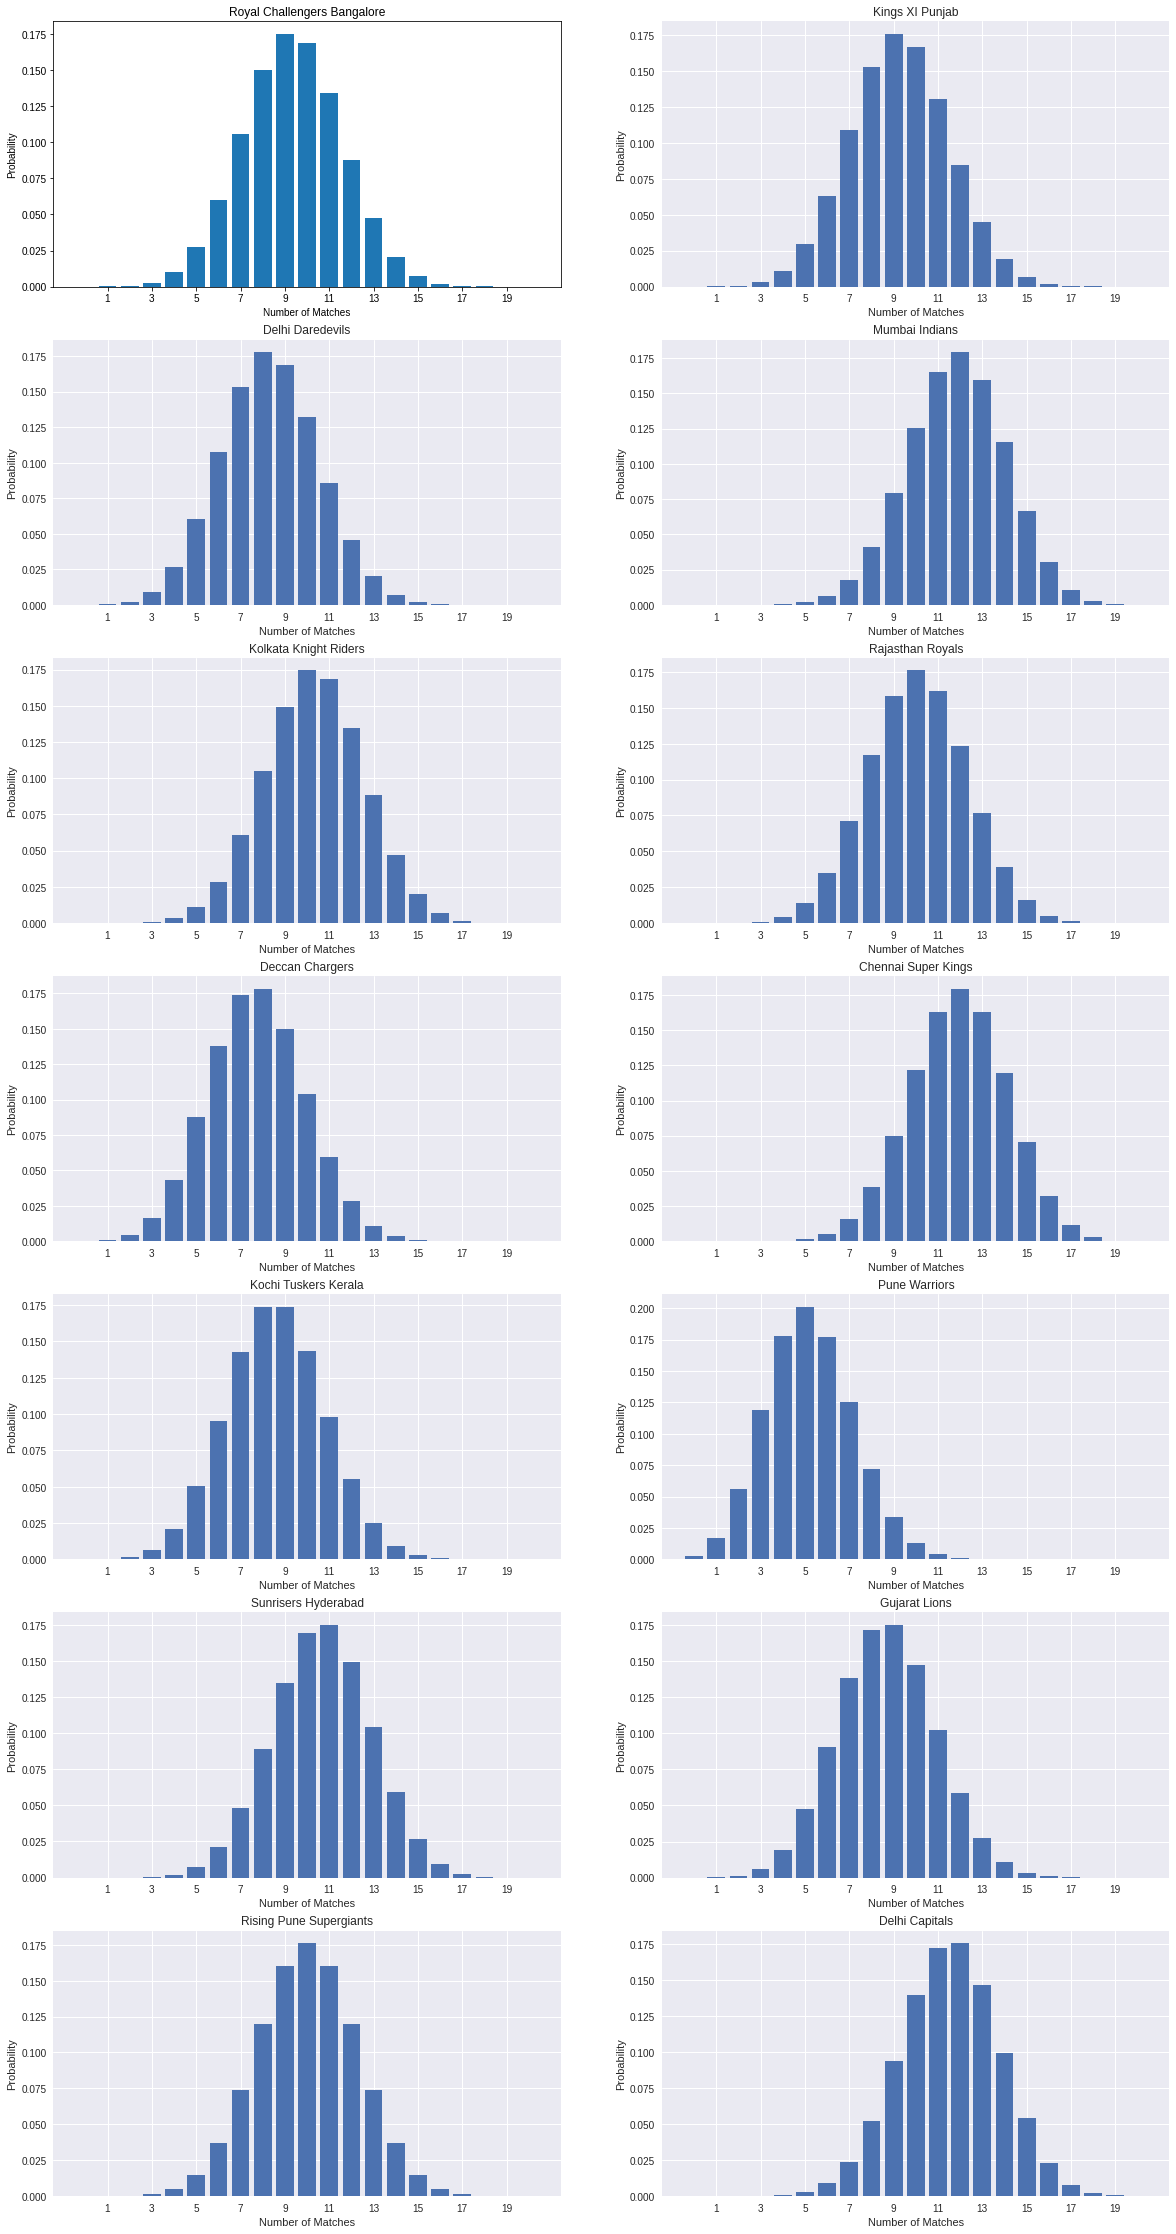

In [12]:
# Plot the distribution for 50 matches
max_team_matches = {}
n = 20
plt.figure(figsize=(20, 40))
for i, team in enumerate(IPL_teams):
    plt.subplot(7, 2, i+1)
    max_team_matches[team] = plot_binomial_distribution(team, n, winning_probability_map[team])

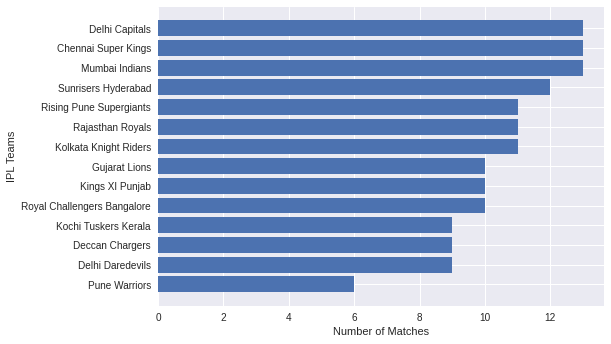

In [13]:
# Plot the teams with matches
sorted_matches_team = dict([(team[0], max_team_matches[team[0]]) for team in sorted(max_team_matches.items(), key = lambda x : x[1])])
plt.barh(y=list(sorted_matches_team.keys()), width=list(sorted_matches_team.values()))
plt.xlabel("Number of Matches")
plt.ylabel("IPL Teams")
plt.show()

# Poisson Distribution

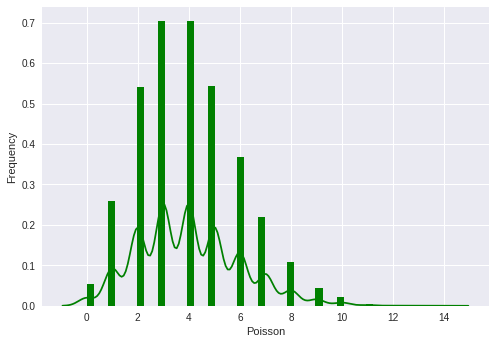

In [14]:
# Poisson Distribution is a special case of Binomial Theorem, or we can say a limiting case of Binomial theorem. When number of trials are tending to inifinte and the success probability is small. Such Events are called Rare Events
data_binom = stats.poisson.rvs(mu=4, size=10000)
ax = sns.distplot(data_binom,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')
plt.show()

# Normal Distribution

**The Normal (Gaussian) Distribution is a type of Continuous Probability Distribution of a Real-Values Random Variable. If the mean of the distribution is $\mu$ and the standard deviation of the distribution is $\sigma$ then the Probability Density Function of the Normal Distribution is given by:**

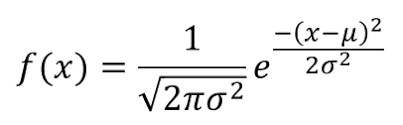

**If the Mean $\mu$ is 1 and the Standard Deviation $\sigma$ is 0 then the Normal Distribution is called Standard Normal Distribution.**

**Some of the Real Life examples where Normal Distribution is observed are:**

* Height of People in the world
* Income Distribution in a economy
* Shoe sizes
* Student Performances(marks)
* Birth Weight of children

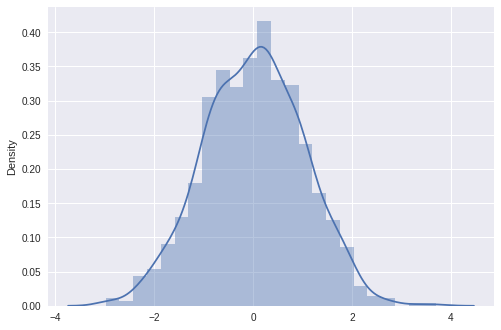

In [15]:
# Using Scipy to generate Normal Distribution
random_var = stats.norm.rvs(size=1000, random_state=3)

# plot the normal distribution (Bell Shaped Curve)
sns.distplot(random_var)
plt.show()

# Emperical Rule

There are several reasons that Normal Distribution is so popular, one because it is one of the most common distributions observed in real world. Second, requires the least math, lol and third, because of the Emperical Rule. The Emperical Rule tells us what percentage of data will lie between certain intervals. It can be stated as follows:

1. 67% of the data lies between first standard deviation.
2. 95% of the data lies between second standard deviation.
3. 99.7% of the data lies between third standard deviation.

In [16]:
# Proof
mu = random_var.mean()
sigma = random_var.std()

# Compute intervals on the basis of first, second and third standard deviations

# 1. First Std dev
first_std_1 = mu + sigma
first_std_2 = mu - sigma

# 2. Second Std dev
second_std_1 = mu + 2*sigma
second_std_2 = mu - 2*sigma

# 3. Third Std dev
third_std_1 = mu + 3*sigma
third_std_2 = mu - 3*sigma

# Separate the data into 3 parts i.e within the first, second and third deviations

data_1 = random_var[(random_var < first_std_1) & (random_var > first_std_2)]
data_2 = random_var[(random_var < second_std_1) & (random_var > second_std_2)]
data_3 = random_var[(random_var < third_std_1) & (random_var > third_std_2)]

# Print the %age of data in the variables data_1,data_2 and data_3
print("Percentage of data between first standard deviations {} %".format(data_1.shape[0]*100/random_var.shape[0]))
print("Percentage of data between second standard deviations {} %".format(data_2.shape[0]*100/random_var.shape[0]))
print("Percentage of data between third standard deviations {} %".format(data_3.shape[0]*100/random_var.shape[0]))

Percentage of data between first standard deviations 68.5 %
Percentage of data between second standard deviations 96.1 %
Percentage of data between third standard deviations 99.8 %


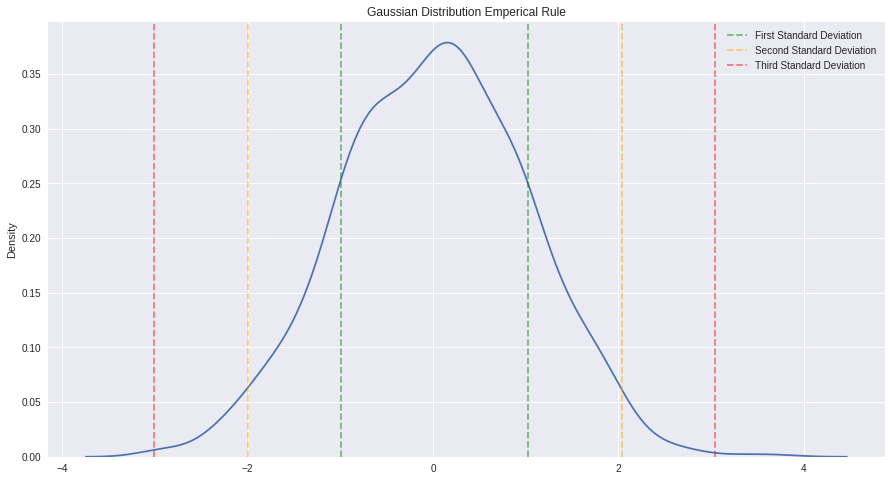

In [17]:
# Plot the emperical rule
figure, ax = plt.subplots(1,1, figsize=(15,8))
sns.kdeplot(random_var, ax=ax)
ax.axvline(first_std_1, linestyle= 'dashed', c = 'green', alpha=0.5, label='First Standard Deviation')
ax.axvline(first_std_2, linestyle= 'dashed', c = 'green', alpha=0.5)
ax.axvline(second_std_1, linestyle= 'dashed', c = 'orange', alpha=0.5, label='Second Standard Deviation')
ax.axvline(second_std_2, linestyle= 'dashed', c = 'orange', alpha=0.5)
ax.axvline(third_std_1, linestyle= 'dashed', c = 'red', alpha=0.5, label='Third Standard Deviation')
ax.axvline(third_std_2, linestyle= 'dashed', c = 'red', alpha=0.5)
plt.legend(loc='best')
plt.title("Gaussian Distribution Emperical Rule")
plt.show()

# Exponential Distribution

**In probability theory, Exponential Distribution describes the waiting time in a Poisson process. For example, How long until lighting strikes your city? The key assumption here is, The waiting time is independent of the time you have already waited.**

**The Probability Distribution Function of an exponential distribution is given as:**

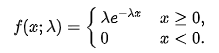

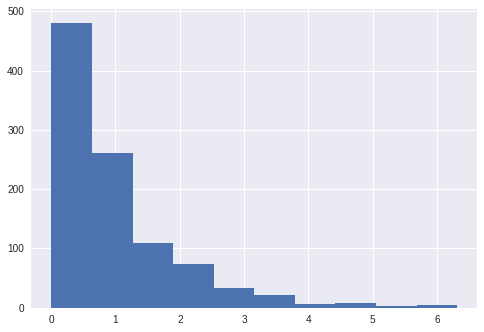

In [18]:
exp_dist = stats.expon.rvs(size=1000)
plt.hist(exp_dist)
plt.show()

## How to confirm the distribution of a variable?

### QQ Plot

**In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. First, the set of intervals for the quantiles is chosen. A point (x, y) on the plot corresponds to one of the quantiles of the second distribution (y-coordinate) plotted against the same quantile of the first distribution (x-coordinate). Thus the line is a parametric curve with the parameter which is the number of the interval for the quantile.**

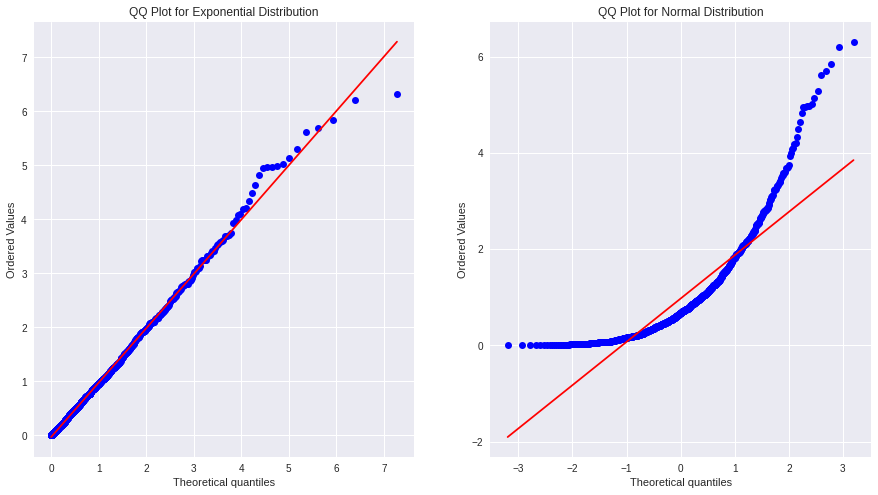

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

qq_plot_1 = stats.probplot(exp_dist, dist='expon', plot=ax[0])
qq_plot_2 = stats.probplot(exp_dist, dist='norm', plot=ax[1])
ax[0].set_title("QQ Plot for Exponential Distribution")
ax[1].set_title("QQ Plot for Normal Distribution")
plt.show()

* From the above QQ Plots we can understand how to understand and confirm the distributions of varibales.
* The first QQ plot confirms that the probability distribution is Exponential.
* The second QQ plot confirms that the probability distirbution is not Normal.

<p style= "font-size : 20px ; color : Crimson">I hope you found this notebook helpful. Please do give me a feedback in the comment section and do upvote it if you liked it. Thanks!!